In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **reading dataset**

In [47]:
data=pd.read_csv('/content/drive/MyDrive/PASSWORD/data.csv',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [48]:
data['strength'].unique()

array([1, 2, 0])

#### code to check all the missing values in my dataset

In [49]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [50]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [51]:
data.dropna(inplace=True)

In [52]:
data.isnull().sum()

password    0
strength    0
dtype: int64

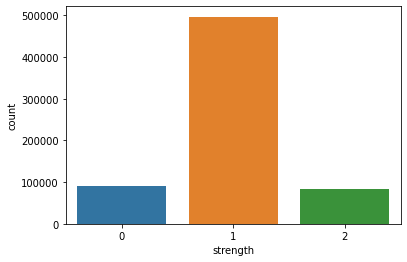

In [53]:
sns.countplot(data['strength'])

In [54]:
password_tuple=np.array(data)

In [55]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

#### **shuffling randomly for robustness**

In [56]:
import random
random.shuffle(password_tuple)

In [57]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


#### **create a custom function to split input into characters of list**

In [59]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [60]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

#### **import TF-IDF vectorizer to convert String data into numerical data**

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

#### **apply TF-IDF vectorizer on data**

In [63]:
X=vectorizer.fit_transform(x)

In [64]:
X.shape

(669639, 131)

In [65]:
vectorizer.get_feature_names()

['\x01',
 '\x02',
 '\x05',
 '\x06',
 '\x08',
 '\x10',
 '\x11',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¢',
 '¨',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¼',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'ê',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '‚',
 '‹',
 '›']

In [66]:
first_document_vector=X[0]
first_document_vector

<1x131 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [67]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56668533],
        [0.        ],
        [0.5918464 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [68]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591846
5,0.566685
z,0.336316
k,0.291317
d,0.285719
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


#### **split data into train & test**
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [71]:
X_train.shape

(535711, 131)

In [72]:
from sklearn.linear_model import LogisticRegression

#### **apply Logistic on data as use-cas is Classification**

In [73]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [74]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### **doing prediction for specific custom data**

In [83]:
passwordCheck = input("Enter Password to check Strength: ")

dt=np.array([passwordCheck])
pred=vectorizer.transform(dt)
x = clf.predict(pred)
if x[0] == 0:
  print("Your Password is Weak.")
elif x[0] == 1:
  print("Your Password is Strong.")
else:
  print("Your Password is Very Strong.")

Enter Password to check Strength: @%12ABCXYZ$
Your Password is Very Strong.


#### **doing prediction on X-Test data**

In [76]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 2, ..., 1, 1, 1])

#### **check Accuracy of your model using confusion_matrix,accuracy_score**

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [78]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 5071 12733    12]
 [ 3608 93462  2568]
 [   28  5024 11422]]
0.8210008362702348


##### **create report of your model**

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.28      0.38     17816
           1       0.84      0.94      0.89     99638
           2       0.82      0.69      0.75     16474

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

